In [324]:
import numpy as np
import pandas as pd
#import seaborn as sns
import matplotlib.pyplot as plt
#from tqdm import tqdm
from sklearn.preprocessing import MinMaxScaler as MMS
from sklearn.preprocessing import StandardScaler as SS
import re
import random
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import ElasticNet
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn import metrics
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis as QDA
from sklearn.decomposition import PCA
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.linear_model import LogisticRegression
from sklearn.gaussian_process.kernels import DotProduct, WhiteKernel
from sklearn.feature_selection import RFE
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR

In [325]:
df=pd.read_csv('C:\\Users\\KARAN\\Desktop\\diet project\\train_data_329x19.csv')
df.drop(axis=1,labels='Unnamed: 0',inplace=True)
df.dropna(axis=0,inplace=True)
df.reset_index(drop=True,inplace=True)
x=df.iloc[:,:13]

y=df.iloc[:,13:14]



In [326]:
print("SHAPE: ")
print("x Shape: ",x.shape)
print("y Shape: ",y.shape)

SHAPE: 
x Shape:  (325, 13)
y Shape:  (325, 1)


In [327]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=None)

In [328]:
x_test.shape

(65, 13)

In [329]:
rf=RandomForestRegressor(n_estimators=1000,max_depth=5,criterion='absolute_error')
ab=AdaBoostRegressor()
gb=GradientBoostingRegressor(n_estimators=200,max_depth=3,loss='huber',alpha=0.4,criterion='squared_error',learning_rate=0.1)
svr=SVR()
dtr=DecisionTreeRegressor(criterion='squared_error',max_depth=4)

In [330]:
ss=SS()

# synthetic data

In [331]:
from sdv.tabular import GaussianCopula

In [332]:
model = GaussianCopula(
    field_distributions={
        'weight': 'gamma',
        'UREA': 'gaussian_kde',
        'HB': 'gaussian_kde',
        'K': 'truncated_gaussian',
        'HBA1C': 'gaussian_kde',
        'SGOT': 'gaussian_kde',
        'SGPT': 'gaussian_kde',

    },
)
model.fit(df)
# dropping ['HBA1C','FBS','Na','HB','Ht','SGOT','SGPT']

In [333]:
sample = model.sample(500)
sample.head()

,patient_age,patient_gender,Ht,Wt,HB,UREA,CR,Na,K,FBS,HBA1C,SGOT,SGPT,calories,cho,Fat,pro,fluids,NA
0,85.0,0,159.4,65.55,14.85,109.49,1.09,136.0,3.82,88.0,9.58,21.3,17.89,1470.0,208.2,25.5,58.0,120.9,4.0
1,68.0,1,165.2,76.51,12.08,23.23,0.98,136.0,3.88,93.0,7.06,17.1,21.71,1877.0,270.3,30.4,73.0,138.8,4.0
2,71.0,0,161.3,48.44,13.98,116.46,0.69,132.0,4.57,106.0,9.42,27.2,26.71,1471.0,166.0,19.8,56.0,92.3,6.0
3,19.0,0,164.6,84.93,13.50,28.40,0.58,140.0,4.17,103.0,4.60,22.1,28.57,2005.0,468.5,31.7,79.0,14.6,7.0
4,59.0,0,158.4,75.69,12.56,97.65,1.35,131.0,4.08,87.0,6.61,19.6,20.07,1583.0,276.2,27.0,69.0,59.7,6.0


<AxesSubplot:>

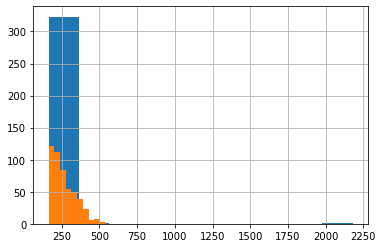

In [334]:
df.cho.hist()
sample.cho.hist()

array([[<AxesSubplot:title={'center':'patient_age'}>,
        <AxesSubplot:title={'center':'patient_gender'}>,
        <AxesSubplot:title={'center':'Ht'}>,
        <AxesSubplot:title={'center':'Wt'}>],
       [<AxesSubplot:title={'center':'HB'}>,
        <AxesSubplot:title={'center':'UREA'}>,
        <AxesSubplot:title={'center':'CR'}>,
        <AxesSubplot:title={'center':'Na'}>],
       [<AxesSubplot:title={'center':'K'}>,
        <AxesSubplot:title={'center':'FBS'}>,
        <AxesSubplot:title={'center':'HBA1C'}>,
        <AxesSubplot:title={'center':'SGOT'}>],
       [<AxesSubplot:title={'center':'SGPT'}>,
        <AxesSubplot:title={'center':'calories'}>,
        <AxesSubplot:title={'center':'cho'}>,
        <AxesSubplot:title={'center':'Fat'}>],
       [<AxesSubplot:title={'center':'pro'}>,
        <AxesSubplot:title={'center':'fluids'}>,
        <AxesSubplot:title={'center':'NA'}>, <AxesSubplot:>]],
      dtype=object)

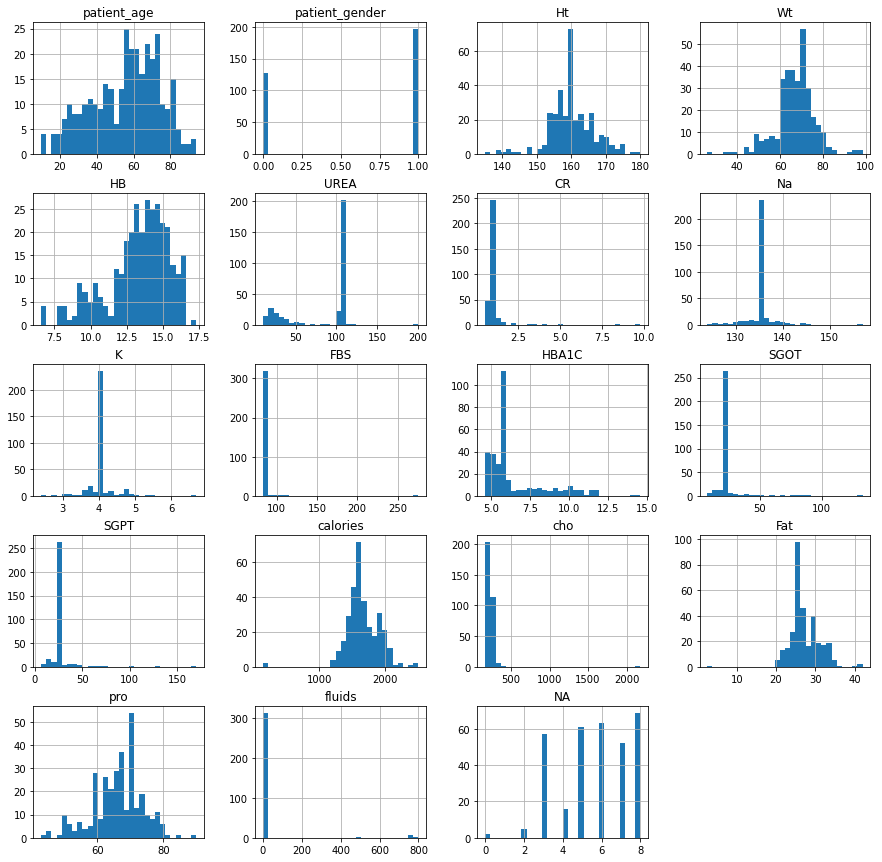

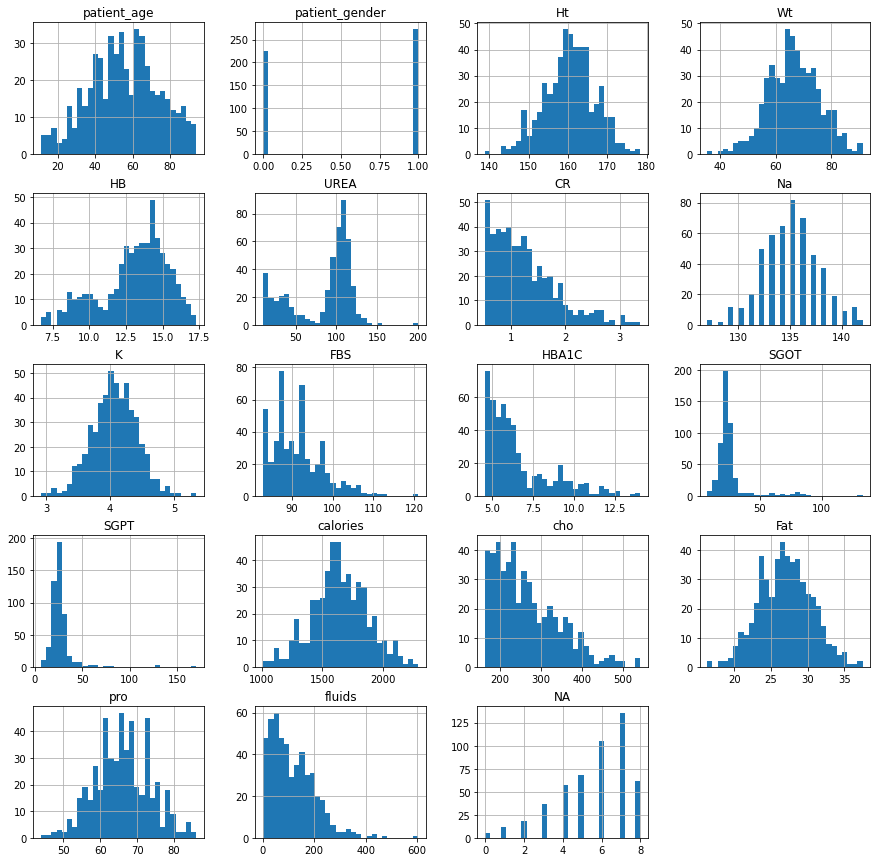

In [335]:
df.hist(bins=30, figsize=(15, 15))
sample.hist(bins=30, figsize=(15, 15))

## weight,hb,UREA*,k,HBA1C*,SGOT*,SGPT*,NA have inconsistant values

<AxesSubplot:>

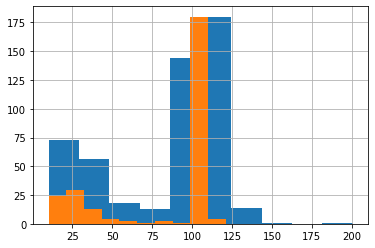

In [336]:
sample.UREA.hist()
x_train.UREA.hist()


## FIxed inconsistency in weight,hb,UREA*,k,HBA1C*,SGOT*,SGPT* creation

In [337]:
sample_x=sample.iloc[:,:13]
sample_y=sample.iloc[:,13:14]

In [338]:
frames_x = [sample_x,x_train]
frames_y = [sample_y,y_train]

In [339]:
result_x = pd.concat(frames_x)
result_y = pd.concat(frames_y)

In [340]:
result_x.shape
result_y.shape

(760, 1)

In [341]:
rf.fit(ss.fit_transform(result_x),ss.fit_transform(result_y))
ab.fit(ss.fit_transform(result_x),ss.fit_transform(result_y))
gb.fit(ss.fit_transform(result_x),ss.fit_transform(result_y))
svr.fit(ss.fit_transform(result_x),ss.fit_transform(result_y))
dtr.fit(ss.fit_transform(result_x),ss.fit_transform(result_y))

C:\Users\KARAN\AppData\Local\Temp\ipykernel_24520\3228913291.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(ss.fit_transform(result_x),ss.fit_transform(result_y))
c:\Users\KARAN\AppData\Local\Programs\Orange\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\KARAN\AppData\Local\Programs\Orange\lib\site-packages\sklearn\ensemble\_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\KARAN\AppData\Local\Programs\Orange\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed 

DecisionTreeRegressor(max_depth=4)

In [342]:
print("TRAIN ACC:")
print('RandomForest acc: ',rf.score(ss.fit_transform(result_x),ss.fit_transform(result_y)))
print('AdaBoost acc: ',ab.score(ss.fit_transform(result_x),ss.fit_transform(result_y)))
print('GradientBoost acc: ',gb.score(ss.fit_transform(result_x),ss.fit_transform(result_y)))
print("SVR acc: ",svr.score(ss.fit_transform(result_x),ss.fit_transform(result_y)))
print("DTR acc: " ,dtr.score(ss.fit_transform(result_x),ss.fit_transform(result_y)))


TRAIN ACC:
RandomForest acc:  0.6289575757134239
AdaBoost acc:  0.5796293594234023
GradientBoost acc:  0.7015178308381743
SVR acc:  0.6428851530259195
DTR acc:  0.5385464582704627


In [343]:
print('RandomForest acc: ',rf.score(ss.fit_transform(x_test),ss.fit_transform(y_test)))
print('AdaBoost acc: ',ab.score(ss.fit_transform(x_test),ss.fit_transform(y_test)))
print('GradientBoost acc: ',gb.score(ss.fit_transform(x_test),ss.fit_transform(y_test)))
print("SVR acc: ",svr.score(ss.fit_transform(x_test),ss.fit_transform(y_test)))
print("DTR acc: ", dtr.score(ss.fit_transform(x_test),ss.fit_transform(y_test)))


RandomForest acc:  0.7197868423483622
AdaBoost acc:  0.7012408685449586
GradientBoost acc:  0.7193214860992848
SVR acc:  0.6287668456471512
DTR acc:  0.5651492931616453


# feature selection


In [344]:
#rfe=RFE(gb,n_features_to_select=None)
#rfe.fit(result_x,result_y)

In [345]:
#rfe.ranking_
# 1 array([1, 1, 2, 1, 4, 1, 1, 3, 1, 8, 6, 5, 7]) #FEATURE SELECTION OF ORIGINAL DATASET (PRIORITY)
# 4 array([1, 1, 4, 1, 8, 1, 5, 2, 6, 1, 1, 3, 7]) #feature selection of synthetic dataset  

In [346]:
result_x

,patient_age,patient_gender,Ht,Wt,HB,UREA,CR,Na,K,FBS,HBA1C,SGOT,SGPT
0,85.0,0,159.4,65.55,14.85,109.49,1.09,136.0,3.82,88.0,9.58,21.3,17.89
1,68.0,1,165.2,76.51,12.08,23.23,0.98,136.0,3.88,93.0,7.06,17.1,21.71
2,71.0,0,161.3,48.44,13.98,116.46,0.69,132.0,4.57,106.0,9.42,27.2,26.71
3,19.0,0,164.6,84.93,13.50,28.40,0.58,140.0,4.17,103.0,4.60,22.1,28.57
4,59.0,0,158.4,75.69,12.56,97.65,1.35,131.0,4.08,87.0,6.61,19.6,20.07
...,...,...,...,...,...,...,...,...,...,...,...,...,...
13,47.0,1,158.0,70.00,14.81,106.40,0.86,135.0,4.10,83.0,5.80,22.8,24.80
124,19.0,0,160.0,68.00,14.44,107.77,0.95,135.0,4.10,83.0,4.93,22.8,24.80
17,67.0,0,154.0,65.20,13.70,33.30,1.38,141.0,4.20,83.0,5.80,22.8,24.80
306,22.0,0,154.0,51.00,14.76,107.52,0.98,135.0,4.10,83.0,5.80,22.8,24.80


In [347]:
result_x.drop(axis=1,labels=['HBA1C','FBS','Na','HB','Ht','SGOT','SGPT'],inplace=True)
x_test.drop(axis=1,labels=['HBA1C','FBS','Na','HB','Ht','SGOT','SGPT'],inplace=True)


In [348]:
result_x.shape

(760, 6)

In [349]:
rf.fit(ss.fit_transform(result_x),ss.fit_transform(result_y))
ab.fit(ss.fit_transform(result_x),ss.fit_transform(result_y))
gb.fit(ss.fit_transform(result_x),ss.fit_transform(result_y))
svr.fit(ss.fit_transform(result_x),ss.fit_transform(result_y))
dtr.fit(ss.fit_transform(result_x),ss.fit_transform(result_y))

C:\Users\KARAN\AppData\Local\Temp\ipykernel_24520\3228913291.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(ss.fit_transform(result_x),ss.fit_transform(result_y))
c:\Users\KARAN\AppData\Local\Programs\Orange\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\KARAN\AppData\Local\Programs\Orange\lib\site-packages\sklearn\ensemble\_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\KARAN\AppData\Local\Programs\Orange\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed 

DecisionTreeRegressor(max_depth=4)

## Train acc on synthetic dataset


In [350]:
print("TRAIN ACC:")
print('RandomForest acc: ',rf.score(ss.fit_transform(result_x),ss.fit_transform(result_y)))
print('AdaBoost acc: ',ab.score(ss.fit_transform(result_x),ss.fit_transform(result_y)))
print('GradientBoost acc: ',gb.score(ss.fit_transform(result_x),ss.fit_transform(result_y)))
print("SVR acc: ",svr.score(ss.fit_transform(result_x),ss.fit_transform(result_y)))
print("DTR acc: " ,dtr.score(ss.fit_transform(result_x),ss.fit_transform(result_y)))


TRAIN ACC:
RandomForest acc:  0.6103566437815893
AdaBoost acc:  0.553316810778206
GradientBoost acc:  0.671545741839573
SVR acc:  0.5653307529474554
DTR acc:  0.5139163921932459


# Test accuracy on actual dataset 


In [351]:
print("TEST ACC:")
print('RandomForest acc: ',rf.score(ss.fit_transform(x_test),ss.fit_transform(y_test)))
print('AdaBoost acc: ',ab.score(ss.fit_transform(x_test),ss.fit_transform(y_test)))
print('GradientBoost acc: ',gb.score(ss.fit_transform(x_test),ss.fit_transform(y_test)))
print("SVR acc: ",svr.score(ss.fit_transform(x_test),ss.fit_transform(y_test)))
print("DTR acc: ", dtr.score(ss.fit_transform(x_test),ss.fit_transform(y_test)))


TEST ACC:
RandomForest acc:  0.7359475851785496
AdaBoost acc:  0.6159485440038004
GradientBoost acc:  0.720284152180525
SVR acc:  0.6567837406216598
DTR acc:  0.5651537456624041


##### THE TEST ACC IS SOMETIMES HIGHER AS FEATURE SELECTION WAS DONE BASED ON THE ORIGINAL DATASET, THEREFORE SYNTHETIC DATASET PERFORMS WITH LOWER ACCURACY BUT GIVES HIGH ON TEST

In [352]:
rf1=metrics.mean_squared_error(ss.fit_transform(y_test),rf.predict(ss.fit_transform(x_test)))
rf2=metrics.mean_absolute_error(ss.fit_transform(y_test),rf.predict(ss.fit_transform(x_test)))**0.5
gb1=metrics.mean_squared_error(ss.fit_transform(y_test),gb.predict(ss.fit_transform(x_test)))
gb2=metrics.mean_absolute_error(ss.fit_transform(y_test),gb.predict(ss.fit_transform(x_test)))**0.5

In [353]:
print("RF:",rf1,rf2,"\nGB:",gb1,gb2)

RF: 0.26405241482145037 0.6272053873417252 
GB: 0.279715847819475 0.6295649390700204
